In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("D:\School\Minor Project\Data Sets\BankChurners.csv")

In [3]:
# data before preprocessing
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [4]:
customers=df[["Customer_Age","Gender","Dependent_count","Education_Level","Marital_Status","Income_Category"]]

In [5]:
customers.rename(columns={"Customer_Age":"Age"},inplace=True)

In [6]:
# data cleaning
# Converting "unknown" values to NaN values by converting string type attributes to categorical for kprototype algorithm
customers["Gender"]=pd.Categorical(customers["Gender"],['M','F'])

In [7]:
customers["Education_Level"]=pd.Categorical(customers["Education_Level"],["Uneducated","High School","College","Graduate","Post-Graduate","Doctorate"],ordered=True)

In [8]:
customers["Marital_Status"]=pd.Categorical(customers["Marital_Status"],["Married","Single","Divorced"])

In [9]:
customers["Income_Category"]=pd.Categorical(customers["Income_Category"],["Less than $40K","$40K - $60K","$60K - $80K","$80K - $120K","$120K +"],ordered=True)

In [10]:
#removing NaN values
customers.fillna({"Education_Level":"Graduate"},inplace=True)

In [11]:
# calculating mean of income
# mean = 90901.8303
# since 90901.8303 lies in $80K - $120K category
customers.fillna({"Income_Category":"$80K - $120K"},inplace=True)

In [12]:
# removing outliers in age column by replacing any value above 110 with the mean
customers.loc[customers["Age"]>110,"Age"]=int(customers["Age"].mean())

In [13]:
# dropping rows which have NaN in marital status
customers.dropna(inplace=True)

In [14]:
# data after preprocessing
customers.head()

Age Gender  Dependent_count Education_Level Marital_Status Income_Category
0   45      M                3     High School        Married     $60K - $80K
1   49      F                5        Graduate         Single  Less than $40K
2   51      M                3        Graduate        Married    $80K - $120K
4   40      M                3      Uneducated        Married     $60K - $80K
5   44      M                2        Graduate        Married     $40K - $60K

In [15]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9378 entries, 0 to 10126
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Age              9378 non-null   int64   
 1   Gender           9378 non-null   category
 2   Dependent_count  9378 non-null   int64   
 3   Education_Level  9378 non-null   category
 4   Marital_Status   9378 non-null   category
 5   Income_Category  9378 non-null   category
dtypes: category(4), int64(2)
memory usage: 256.8 KB


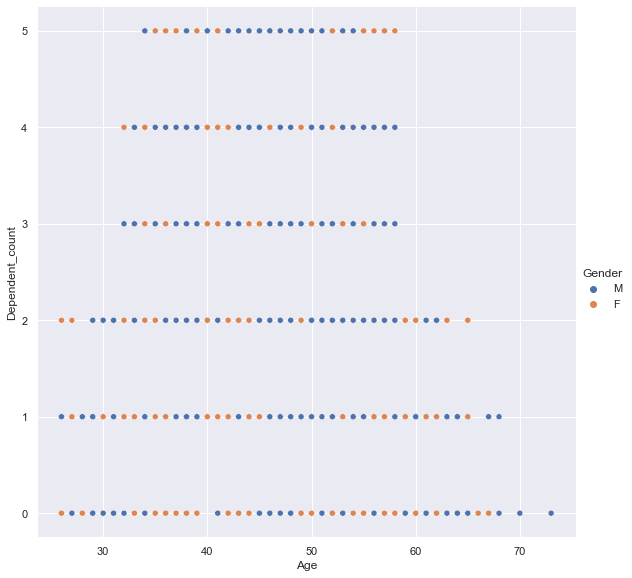

In [16]:
#Relationship Analysis
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.relplot(x="Age",y="Dependent_count",hue="Gender",data=customers,height=8)

In [18]:
#from this we can interpret that males aged 30-55 have higher dependents than any other group
#also, people who have 0 dependents are spread across all groups equally, i:e all ages and both genders

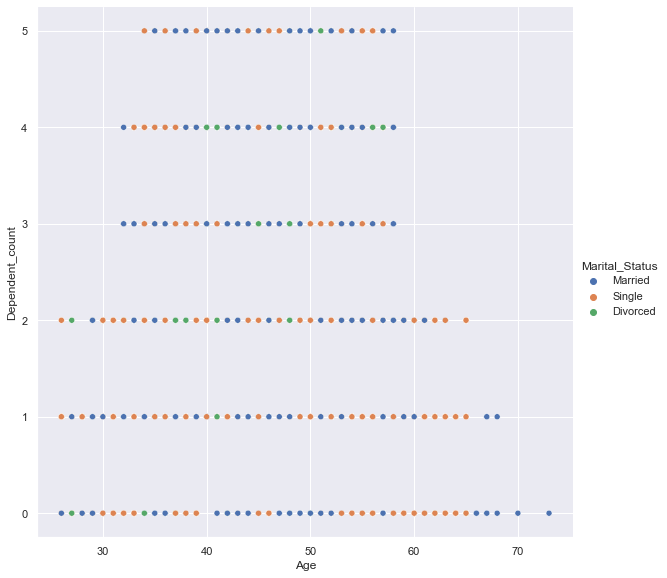

In [19]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.relplot(x="Age",y="Dependent_count",hue="Marital_Status",data=customers,height=8)

In [20]:
# here we can see that middle aged married people tend have the highest dependents and single senior citizens tend have the lowest, probably since they are dependent on someone else.

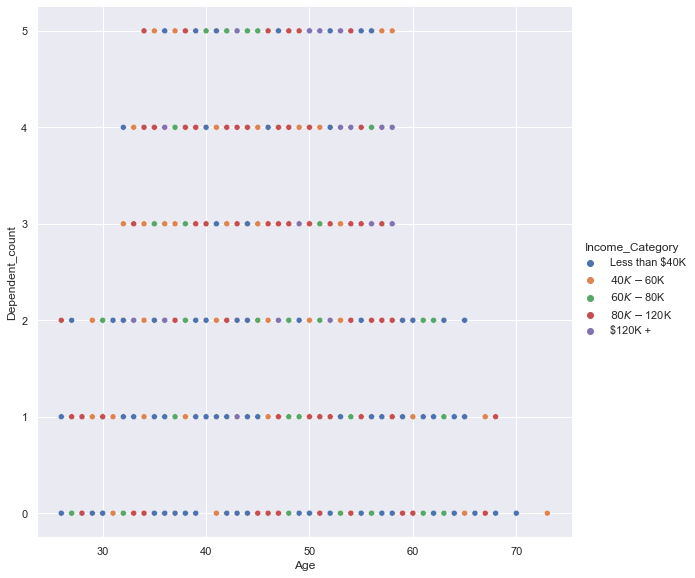

In [21]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.relplot(x="Age",y="Dependent_count",hue="Income_Category",data=customers,height=8)

In [22]:
# as the income increases, people are able to provide for more people than themselves, thus the dependent count increases irrespective of age

(array([1300.,    0., 3311.,    0.,    0., 2429.,    0., 1658.,    0.,
         680.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

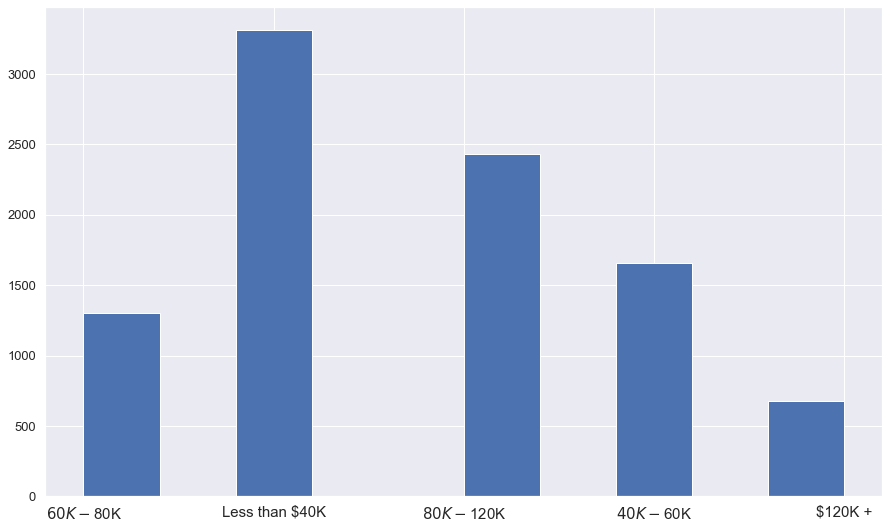

In [23]:
plt.figure(figsize=(15,9))
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.hist(customers.Income_Category)

(array([4400.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4978.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

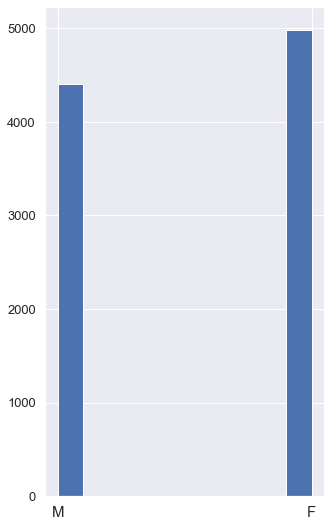

In [24]:
plt.figure(figsize=(5,9))
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.hist(customers.Gender)

In [25]:
# saving the processed dataframe
customers.to_csv("D:\School\Minor Project\Codes\customers.csv",index=False)